## with iris data (petal_length, sepal_aspect_ratio, species), using multiple_linear_regression to predict petal_width 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 

In [2]:
df2 = pd.read_csv("iris_data.csv")
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#add one column (calculate the aspect ratio of sepal)

df2["sepal_aspect_ratio"] = (df2["sepal_length"]/df2["sepal_width"]).round(2)
df2

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_aspect_ratio
0,5.1,3.5,1.4,0.2,setosa,1.46
1,4.9,3.0,1.4,0.2,setosa,1.63
2,4.7,3.2,1.3,0.2,setosa,1.47
3,4.6,3.1,1.5,0.2,setosa,1.48
4,5.0,3.6,1.4,0.2,setosa,1.39
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.23
146,6.3,2.5,5.0,1.9,virginica,2.52
147,6.5,3.0,5.2,2.0,virginica,2.17
148,6.2,3.4,5.4,2.3,virginica,1.82


In [4]:
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(df2[["species"]])
species_encoded = onehot_encoder.transform(df2[["species"]]).toarray()
species_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [5]:
df2[["species A","species B","species C"]]= species_encoded

In [6]:
df2 = df2.drop(["species","species C"], axis=1) #remove these two after onehot_encoding transformation
df2

,sepal_length,sepal_width,petal_length,petal_width,sepal_aspect_ratio,species A,species B
0,5.1,3.5,1.4,0.2,1.46,1.0,0.0
1,4.9,3.0,1.4,0.2,1.63,1.0,0.0
2,4.7,3.2,1.3,0.2,1.47,1.0,0.0
3,4.6,3.1,1.5,0.2,1.48,1.0,0.0
4,5.0,3.6,1.4,0.2,1.39,1.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.23,0.0,0.0
146,6.3,2.5,5.0,1.9,2.52,0.0,0.0
147,6.5,3.0,5.2,2.0,2.17,0.0,0.0
148,6.2,3.4,5.4,2.3,1.82,0.0,0.0


In [7]:
#train & test - processing data

X = df2[["petal_length","sepal_aspect_ratio","species A","species B"]]
y = df2["petal_width"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [8]:
from sklearn.preprocessing import StandardScaler   # feature scaling to accelerate the optimizing 

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_train
x_test = scaler.transform(x_test)

In [9]:
# y = w1*x1 + w2*x2 + w3*x3+ w4*x4 + b

w = np.array([1,2,3,4])
b = 1
x_train*w
y_pred = (x_train*w).sum(axis=1) + b 

In [10]:

# petal_width = w1*petal_length + w2*sepal_aspect_ratio + w3*species A+ w4*species B + b
# cost = (real data - predicted data) ^ 2 (smaller, better/closer to real data) 

((y_train - y_pred)**2).mean()

np.float64(13.713398770842037)

In [11]:
def compute_cost(x,y,w,b):
    y_pred = (x*w).sum(axis=1) + b 
    cost = ((y - y_pred)**2).mean()
    return cost

In [12]:
#take w,b with random value, to check the func valid: 
w = np.array([1,2,3,4])
b = 0
compute_cost(x_train,y_train,w,b)

np.float64(15.191494008937276)

In [13]:
# the next step is to find w,b, using optimizer - gadient descent 
# w1 - w1_gradient*learning_rate 
# w2 - w2_gradient*learning_rate 
# w3 - w3_gradient*learning_rate 
# w4 - w4_gradient*learning_rate 
# b - b_gradient*learning_rate 

# (y_pred-y)**2 
# y_pred = w1*x1 + w2*x2 + w3*x3+ w4*x4 + b

y_pred = (x_train*w).sum(axis=1) + b 

#
b_gradient = (2*(y_pred - y_train)).mean()
b_gradient

# x1 = x_train[:,0]
# w1_gradient = (2*x1*(y_pred - y_train)).mean()

# x2 = x_train[:,1]
# w2_gradient = (2*x2*(y_pred - y_train)).mean()

# x3 = x_train[:,2]
# w3_gradient = (2*x3*(y_pred - y_train)).mean()

# x4 = x_train[:,3]
# w4_gradient = (2*x4*(y_pred - y_train)).mean()
# w4_gradient

w_gradient = np.zeros(x_train.shape[1]) #using a loop to track w_gradients
for i in range(x_train.shape[1]):
    w_gradient[i] = (2*x_train[:,i]*(y_pred - y_train)).mean()
w_gradient

array([-0.46383813,  2.39720682, -1.74961046,  6.79072449])

In [14]:
def compute_gradient(x,y,w,b):
    y_pred = (x*w).sum(axis=1) + b 
    w_gradient = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        w_gradient[i] = (2*x[:,i]*(y_pred - y)).mean()
    b_gradient = (2*(y_pred - y)).mean()
    return w_gradient, b_gradient

In [15]:
#simply using a random w,b to check the function 
w = np.array([1,2,3,4])
b = 0
compute_gradient(x_train,y_train,w,b)

(array([-0.46383813,  2.39720682, -1.74961046,  6.79072449]),
 np.float64(-2.4780952380952384))

In [16]:
learning_rate = 0.001

w_gradient, b_gradient = compute_gradient(x_train,y_train,w,b)
print(compute_cost(x_train,y_train,w,b))
w = w - w_gradient*learning_rate
b = b - b_gradient*learning_rate

print(compute_cost(x_train,y_train,w,b))

15.191494008937276
15.13030362770675


In [17]:
np.set_printoptions(formatter={"float": "{: .2e}".format})

def gradient_descent(x,y,w_init,b_init,run_iter,print_iter,learning_rate):
    w = w_init
    b = b_init
    
    cost_hist = []
    w_hist = []
    b_hist = []

    for i in range(run_iter): 
        
        w_gradient, b_gradient = compute_gradient(x,y,w,b)
        
        w = w-w_gradient*learning_rate 
        b = b-b_gradient*learning_rate 
        cost = compute_cost(x,y,w,b)
        cost_hist.append(cost)
        w_hist.append(w)
        b_hist.append(b)
        
        if i%print_iter == 0:
            print(f"iteration {i:4} showed cost: {cost:8.4f},  w:{w},  b:{b:8.4f},  w_gradient:{w_gradient},  b_gradient:{b_gradient:8.4f}")
    return w,b,w_hist, b_hist, cost_hist 

In [18]:
w_init = np.array([1,2,3,4])
b_init = 0

learning_rate=0.01
run_iter = 10001
print_iter = 1000

w_final, b_final, w_hist, b_hist, cost_hist = gradient_descent(x_train,y_train,w_init,b_init,run_iter,print_iter,learning_rate)

iteration    0 showed cost:  14.5875,  w:[ 1.00e+00  1.98e+00  3.02e+00  3.93e+00],  b:  0.0248,  w_gradient:[-4.64e-01  2.40e+00 -1.75e+00  6.79e+00],  b_gradient: -2.4781
iteration 1000 showed cost:   0.1700,  w:[ 1.89e+00 -9.16e-02  1.24e+00  4.13e-01],  b:  1.2390,  w_gradient:[ 7.13e-02  1.87e-02  9.93e-02  3.07e-02],  b_gradient: -0.0000
iteration 2000 showed cost:   0.0741,  w:[ 1.30e+00 -1.50e-01  5.20e-01  1.69e-01],  b:  1.2390,  w_gradient:[ 4.53e-02  1.64e-03  5.29e-02  1.85e-02],  b_gradient: -0.0000
iteration 3000 showed cost:   0.0429,  w:[ 9.53e-01 -1.61e-01  1.16e-01  2.66e-02],  b:  1.2390,  w_gradient:[ 2.60e-02  7.53e-04  3.02e-02  1.06e-02],  b_gradient: -0.0000
iteration 4000 showed cost:   0.0326,  w:[ 7.54e-01 -1.67e-01 -1.15e-01 -5.48e-02],  b:  1.2390,  w_gradient:[ 1.49e-02  4.27e-04  1.73e-02  6.08e-03],  b_gradient: -0.0000
iteration 5000 showed cost:   0.0293,  w:[ 6.40e-01 -1.70e-01 -2.48e-01 -1.01e-01],  b:  1.2390,  w_gradient:[ 8.51e-03  2.44e-04  9.88

In [19]:
w_final, b_final

(array([ 4.96e-01, -1.74e-01, -4.14e-01, -1.60e-01]),
 np.float64(1.2390476190476138))

In [20]:
#to test the w_final and b_final values from model; and convert into DataFrame for easier comparison: 

y_pred = (w_final*x_test).sum(axis=1) + b_final
pd.DataFrame({"y_pred":y_pred, "y_test":y_test})

,y_pred,y_test
0,1.438799,1.2
1,0.308235,0.3
2,2.053644,2.3
3,1.431220,1.5
4,1.353275,1.4
5,0.209053,0.4
6,1.234517,1.3
7,1.866347,2.3
8,1.087708,1.5
9,1.220695,1.2


In [21]:
cost = compute_cost(x_test,y_test,w_final,b_final)
print(cost)

0.025532415130589344


In [22]:
# the above compute_cost from test data showed 0.0254, is smaller than cost from train model (iteration 40000 showed cost:   0.0277) - so ok to trust 

# taking a real example: # petal_length = 1.7	sepal_aspect_ratio = 1.5	species A  # Q: what is the petal_width? 
# taking a real example: # petal_length = 1.4	sepal_aspect_ratio = 1.4	species A  # Q: what is the petal_width? 

x_real = np.array([[1.7,1.5,1,0],[1.4,1.39,1,0]]) #2D array here, for the scaler.transform below
x_real = scaler.transform(x_real)
y_real = (w_final*x_real).sum(axis=1) + b_final
y_real

array([ 3.08e-01,  2.72e-01])

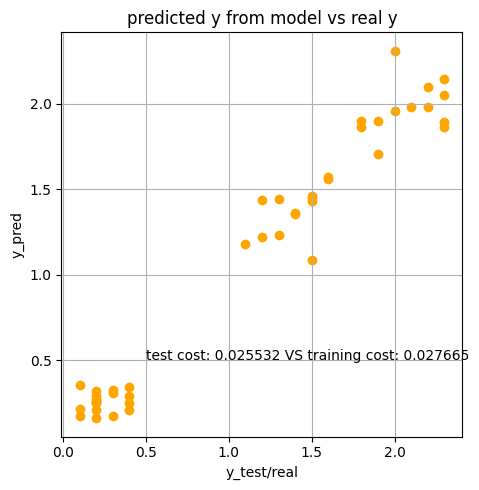

In [23]:
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)
plt.figure(figsize = (5,5))
plt.scatter(y_test,y_pred, color = "orange")
plt.xlabel("y_test/real")
plt.ylabel("y_pred")
plt.text(0.5,0.5,"test cost: %f VS training cost: %f" %(cost,cost_hist[-1]))
plt.title("predicted y from model vs real y")
plt.grid()
plt.tight_layout()
plt.show()